# 데이터 가공, 시각화

In [1]:
import pandas as pd

eq = pd.read_csv('./kor_earthquake_new.csv', encoding='utf-8')

In [2]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         2429 non-null   int64  
 1   Date       2429 non-null   object 
 2   Magnitude  2429 non-null   float64
 3   Latitude   2429 non-null   float64
 4   Longitude  2429 non-null   float64
 5   Pos        2429 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 114.0+ KB


In [3]:
eq.head()

,No,Date,Magnitude,Latitude,Longitude,Pos
0,1,1978.8.30 2:29,4.5,39.1,124.2,북한 평안북도 철산 남남서쪽 84km 해역
1,2,1978.9.16 2:07,5.2,36.6,127.9,경북 상주시 북서쪽 32km 지역
2,3,1978.10.7 18:19,5.0,36.6,126.7,충남 홍성군 동쪽 3km 지역
3,4,1978.11.23 11:06,4.6,38.4,125.6,북한 황해남도 안악 남동쪽 15km 지역
4,5,1978.12.4 15:16,2.8,37.4,128.7,강원 정선군 북동쪽 4km 지역


In [4]:
eq.describe()

,No,Magnitude,Latitude,Longitude
count,2429.000000,2429.000000,2429.000000,2429.000000
mean,1236.811033,2.304199,36.497332,127.596427
std,703.293508,0.770950,1.459391,1.674921
min,1.000000,0.400000,32.350000,122.800000
25%,631.000000,2.000000,35.760000,126.160000
50%,1238.000000,2.300000,36.230000,127.750000
75%,1845.000000,2.700000,37.380000,129.180000
max,2452.000000,5.800000,41.600000,131.100000


In [5]:
# 북한데이터 제거
index_buk = eq[eq['Pos'].str.split(' ').str[0] == '북한'].index
eq_no_buk = eq.drop(index_buk)
eq_no_buk.reset_index(drop=True,inplace=True)
eq_data = eq_no_buk

In [6]:
# # 진도 3 이상
# index_3 = eq[eq['Magnitude'] < 3.0].index
# eq_more_3 = eq.drop(index_3)
# eq_more_3.reset_index(drop=True, inplace=True)
# eq_data = eq_more_3

In [7]:
# # 북한데이터 제거, 진도 3 이상
# index_buk = eq[eq['Pos'].str.split(' ').str[0] == '북한'].index
# eq_no_buk = eq.drop(index_buk)
# index_3 = eq_no_buk[eq_no_buk['Magnitude'] < 3.0].index
# eq_no_buk_and_more_3 = eq_no_buk.drop(index_3)
# eq_no_buk_and_more_3.reset_index(drop=True, inplace=True)
# eq_data = eq_no_buk_and_more_3

In [8]:
eq_data

,No,Date,Magnitude,Latitude,Longitude,Pos
0,2,1978.9.16 2:07,5.2,36.60,127.90,경북 상주시 북서쪽 32km 지역
1,3,1978.10.7 18:19,5.0,36.60,126.70,충남 홍성군 동쪽 3km 지역
2,5,1978.12.4 15:16,2.8,37.40,128.70,강원 정선군 북동쪽 4km 지역
3,6,1978.12.12 21:58,3.3,35.90,126.30,전북 군산시 서남서쪽 38km 해역
4,7,1979.1.1 0:11,2.9,36.60,126.70,충남 홍성군 동쪽 3km 지역
...,...,...,...,...,...,...
2051,2448,2019.8.18 15:38,1.4,36.54,129.63,경북 영덕군 동북동쪽 27km 해역
2052,2449,2019.8.18 15:48,1.5,36.54,129.63,경북 영덕군 동북동쪽 27km 해역
2053,2450,2019.8.18 18:06,1.3,36.53,129.65,경북 영덕군 동북동쪽 28km 해역
2054,2451,2019.8.19 0:22,1.2,36.53,129.63,경북 영덕군 동북동쪽 27km 해역


In [9]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# latitude = []
# longitude = []

# for i in range(len(eq)):
#     latitude.append(eq['Latitude'][i])
#     longitude.append(eq['Longitude'][i])
    
# plt.figure(figsize=(5,10))
# plt.scatter(latitude, longitude, s=eq['Magnitude']**3)
# plt.show()

In [10]:
import folium

In [11]:
position  = []

for i in range(len(eq_data)):
    position.append((eq_data['Latitude'][i], eq_data['Longitude'][i]))

In [12]:
m = folium.Map(location=[36, 128], zoom_start=7, tiles = 'Cartodb Positron')

for i in range(len(position)):
    folium.Circle(
    location = position[i],
        radius = eq_data['Magnitude'][i]**5,
        color = 'deeppink',
        fill = True
    ).add_to(m)
m

In [13]:
from folium.plugins import HeatMap

HeatMap(position).add_to(m)
m

# 데이터 분석(군집화)

## 군집화 시각화

In [14]:
eq_cluster = eq_data[['Longitude', 'Latitude', 'Magnitude']]
eq_cluster

,Longitude,Latitude,Magnitude
0,127.90,36.60,5.2
1,126.70,36.60,5.0
2,128.70,37.40,2.8
3,126.30,35.90,3.3
4,126.70,36.60,2.9
...,...,...,...
2051,129.63,36.54,1.4
2052,129.63,36.54,1.5
2053,129.65,36.53,1.3
2054,129.63,36.53,1.2


In [15]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=156).fit(eq_cluster)
eq_cluster['cluster'] = kmeans.labels_
eq_cluster.head()

,Longitude,Latitude,Magnitude,cluster
0,127.9,36.6,5.2,0
1,126.7,36.6,5.0,2
2,128.7,37.4,2.8,0
3,126.3,35.9,3.3,2
4,126.7,36.6,2.9,2


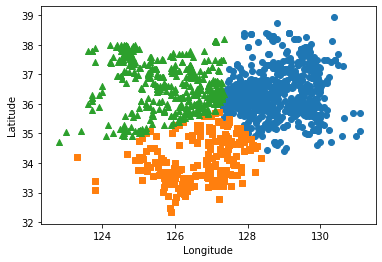

In [18]:
# 데이터 : 좌표

marker0 = eq_cluster[eq_cluster['cluster']==0].index
marker1 = eq_cluster[eq_cluster['cluster']==1].index
marker2 = eq_cluster[eq_cluster['cluster']==2].index

plt.scatter(x=eq_cluster.loc[marker0, 'Longitude'], y=eq_cluster.loc[marker0, 'Latitude'], marker='o')
plt.scatter(x=eq_cluster.loc[marker1, 'Longitude'], y=eq_cluster.loc[marker1, 'Latitude'], marker='s')
plt.scatter(x=eq_cluster.loc[marker2, 'Longitude'], y=eq_cluster.loc[marker2, 'Latitude'], marker='^')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

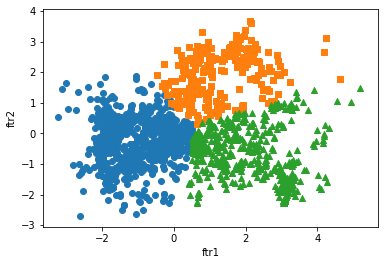

In [19]:
# 데이터 : 좌표 + 진도, 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(eq_cluster[['Longitude', 'Latitude', 'Magnitude']])

eq_cluster['ftr1'] = pca_transformed[:, 0]
eq_cluster['ftr2'] = pca_transformed[:, 1]
eq_cluster.head()

marker0 = eq_cluster[eq_cluster['cluster']==0].index
marker1 = eq_cluster[eq_cluster['cluster']==1].index
marker2 = eq_cluster[eq_cluster['cluster']==2].index

plt.scatter(x=eq_cluster.loc[marker0, 'ftr1'], y=eq_cluster.loc[marker0, 'ftr2'], marker='o')
plt.scatter(x=eq_cluster.loc[marker1, 'ftr1'], y=eq_cluster.loc[marker1, 'ftr2'], marker='s')
plt.scatter(x=eq_cluster.loc[marker2, 'ftr1'], y=eq_cluster.loc[marker2, 'ftr2'], marker='^')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

## 군집 평가(실루엣 분석)

In [20]:
# KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=156).fit(eq_cluster)
eq_cluster['cluster'] = kmeans.labels_
eq_cluster.head()

,Longitude,Latitude,Magnitude,cluster,ftr1,ftr2
0,127.9,36.6,5.2,1,0.068513,-0.044945
1,126.7,36.6,5.0,0,1.257495,-0.125111
2,128.7,37.4,2.8,1,-0.865970,-1.189872
3,126.3,35.9,3.3,0,1.602363,0.274351
4,126.7,36.6,2.9,0,1.161735,-0.464597


In [39]:
# 실루엣 분석 : 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는가(1에 가까울수록 좋다)
# 실루엣 계수 값 구하기
from sklearn.metrics import silhouette_samples, silhouette_score

eq_cluster['silhouette_coeff'] = silhouette_samples(eq_cluster[['Longitude', 'Latitude', 'Magnitude']], \
                                                    eq_cluster['cluster'])
eq_cluster.head()

,Longitude,Latitude,Magnitude,cluster,ftr1,ftr2,silhouette_coeff,gmm_cluster,dbscan_cluster
0,127.9,36.6,5.2,1,0.068513,-0.044945,0.113261,0,0
1,126.7,36.6,5.0,0,1.257495,-0.125111,0.167216,0,0
2,128.7,37.4,2.8,1,-0.865970,-1.189872,0.470126,0,0
3,126.3,35.9,3.3,0,1.602363,0.274351,0.185554,0,0
4,126.7,36.6,2.9,0,1.161735,-0.464597,0.337647,0,0


In [40]:
average_score = silhouette_score(eq_cluster[['Longitude', 'Latitude', 'Magnitude']], \
                                 eq_cluster['cluster'])
print('지진 데이터의 평균 실루엣 계수 : {0:.3f}'.format(average_score))

지진 데이터의 평균 실루엣 계수 : 0.446


In [23]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

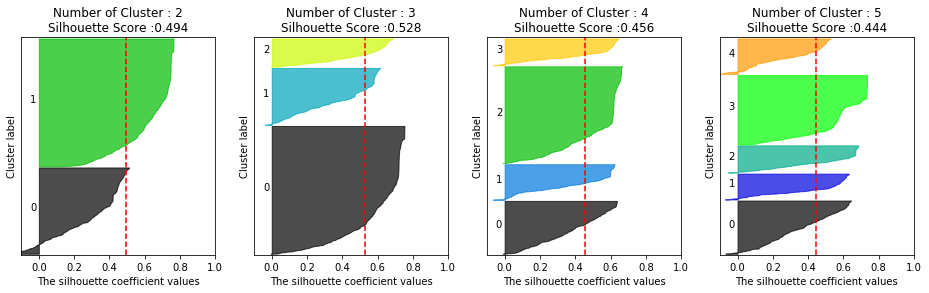

In [24]:
X = eq_cluster[['Longitude', 'Latitude']]
y = eq_cluster['cluster']
visualize_silhouette([2, 3, 4, 5], X)

## 평균 이동(Mean Shift)

In [25]:
from sklearn.cluster import estimate_bandwidth

X = eq_cluster[['Longitude', 'Latitude']]
y = eq_cluster['cluster']

bandwidth = estimate_bandwidth(X)
print('bandwidth :',round(bandwidth, 3))

bandwidth : 1.629


In [26]:
import numpy as np
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=1.629)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels : ', np.unique(cluster_labels))

cluster labels :  [0]


## GMM(Gaussian Mixture Model)

In [27]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['Longitude'], y=label_cluster['Latitude'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [28]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot_with_pca(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

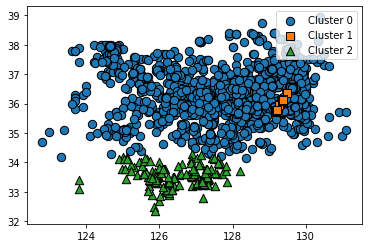

In [29]:
from sklearn.mixture import GaussianMixture

eq_data = eq_cluster[['Longitude', 'Latitude']]
eq_target = eq_cluster['cluster']

gmm = GaussianMixture(n_components=3, random_state=0).fit(eq_data)
gmm_cluster_labels = gmm.predict(eq_data)

# 군집화 결과 저장, 시각화
eq_cluster['gmm_cluster'] = gmm_cluster_labels
visualize_cluster_plot(gmm, eq_cluster, 'gmm_cluster', iscenter=False)

In [30]:
cluster0 = eq_cluster[eq_cluster['gmm_cluster']==0]
cluster1 = eq_cluster[eq_cluster['gmm_cluster']==1]
cluster2 = eq_cluster[eq_cluster['gmm_cluster']==2]

cluster1.describe()

,Longitude,Latitude,Magnitude,cluster,ftr1,ftr2,silhouette_coeff,gmm_cluster
count,356.000000,356.000000,356.000000,356.0,356.000000,356.000000,356.000000,356.0
mean,129.242331,35.883258,2.221910,1.0,-1.383925,0.233862,0.725823,1.0
std,0.082338,0.165730,0.676922,0.0,0.091388,0.188703,0.015173,0.0
min,129.160000,35.710000,0.500000,1.0,-1.648208,-0.239755,0.701752,1.0
25%,129.180000,35.760000,2.000000,1.0,-1.481608,0.062199,0.714398,1.0
50%,129.190000,35.770000,2.200000,1.0,-1.333511,0.317041,0.716087,1.0
75%,129.350000,36.090000,2.500000,1.0,-1.314324,0.365539,0.746351,1.0
max,129.490000,36.370000,5.800000,1.0,-1.164462,0.931748,0.747404,1.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X2 = eq_cluster[['Longitude', 'Latitude']]
X3 = eq_cluster[['Longitude', 'Latitude', 'Magnitude']]
y = eq_cluster['gmm_cluster']

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=156)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("dt_clf accuracy : ", accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("rf_clf accuracy : ", accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("lr_clf accuracy : ", accuracy_score(y_test, lr_pred))

dt_clf accuracy :  1.0
rf_clf accuracy :  1.0
lr_clf accuracy :  0.7451456310679612


## DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=200, metric='euclidean')
dbscan_lables = dbscan.fit_predict(eq_data)
eq_cluster['dbscan_cluster'] = dbscan_lables

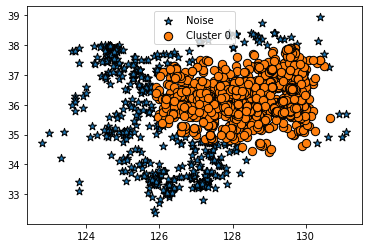

In [37]:
visualize_cluster_plot(dbscan, eq_cluster, 'dbscan_cluster', iscenter=False)